# Nonlinear Equations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Fixed-Point Iteration

In [ ]:
# function for fixed-point iteration

def succ_app(f, g, tolf, tolx, maxit, xTrue, x0=0):
  i=0 # iteration number
  dists = np.zeros(maxit+1, dtype=np.float64) # distances between points calculate in consecutive iterations
  dists[0] = tolx+1
  errs = np.zeros(maxit+1, dtype=np.float64) # vector to log the error at each iteration
  errs[0] = abs(xTrue - x0)
  x = x0 # starting point

  # stopping criteria include:
  #   1. absolute error lower than tollerance AND difference between iterations lower than tollerance (convergence)
  #   2. more than maxit iterations
  while (abs(f(x)) > tolf or dists[i] > tolx) and i < maxit:
    # calculate new point and update vectors
    x_new = g(x)
    dists[i+1] = abs(x_new - x)
    errs[i+1]= abs(xTrue - x_new)
    i=i+1
    x=x_new

  dists = dists[0:i]
  errs = errs[0:i]
  return (x, i, dists, errs)

## Netwon's Method

In [ ]:
# function for Newton's method

def newton(f, df, tolf, tolx, maxit, xTrue, x0=0):
  # Netown's method is a variant of Fixed-Point Iteration where g is defined as below
  g = lambda x: x - f(x) / df(x)
  (x, i, dists, errs) = succ_app(f, g, tolf, tolx, maxit, xTrue, x0)
  return (x, i, dists, errs)

## Auxiliary functions

In [ ]:
# function to plot the nonlinear function f and the zeros found with various methods

def plot_results(f, interval, dict_func_x, xTrue):
  # plot function f
  xplot = np.linspace(interval[0], interval[1])
  fplot = f(xplot)
  plt.plot(xplot, fplot, label='f')

  # plot exact solutions
  fTrue = f(xTrue)
  plt.scatter(xTrue, fTrue, label='True', color='red')

  # plot approximated solutions
  for func, x in dict_func_x.items():
    plt.scatter(x, f(x), label=func)
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
# function to plot the difference between consecutive points at each iteration

def plot_iters_distance(dict_func_dist, max_iter=20):
  for func, diff in dict_func_dist.items():
      plt.plot(diff[:max_iter], '.-', label=func)

  plt.xlabel('Mumber of teration')
  plt.ylabel('Difference between consecutive iterations')
  plt.title('Difference between points vs number of iteration')
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
# function to plot the error at each iteration

def plot_errors_per_iter(dict_func_err, max_iter=20):
  for func, err in dict_func_err.items():
    plt.plot(err[:max_iter], '.-', label=func)

  plt.xlabel('Number of iteration')
  plt.ylabel('Error')
  plt.title('Error vs Number of iteration')
  plt.legend()
  plt.grid()
  plt.show()

## Application to $f(x) =$ $e^x - x^2$

In [ ]:
f = lambda x: np.exp(x) - x**2
df = lambda x: np.exp(x)- 2*x
g1 = lambda x: x-f(x)*np.exp(x/2)
g2 = lambda x: x-f(x)*np.exp(-x/2)

In [ ]:
# exact solution
xTrue = -0.703467

# tollerances and max number of iterations
tolx = 10**(-10)
tolf = 10**(-6)
maxit = 100
# starting point
x0 = 0

sol_g1, iter_g1, dists_g1, errs_g1 = succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print(f'Fixed-point interation with g1 \n\t x = {sol_g1} \n\t iter_new = {iter_g1} \n')

sol_g2, iter_g2, dists_g2, errs_g2 = succ_app(f, g2, tolf, tolx, maxit, xTrue, x0)
print(f'Fixed-point interation with g2 \n\t x = {sol_g2} \n\t iter_new = {iter_g2} \n')

sol_newton, iter_newton, dists_newton, errs_newton = newton(f, df, tolf, tolx, maxit, xTrue, x0)
print(f"Newton's method \n\t x = {sol_newton} \n\t iter_new = {iter_newton} \n")

Fixed-point interation with g1 
	 x = -0.7034674225096886 
	 iter_new = 23 

Fixed-point interation with g2 
	 x = -0.48775858993453886 
	 iter_new = 100 

Newton's method 
	 x = -0.7034674224983917 
	 iter_new = 6 



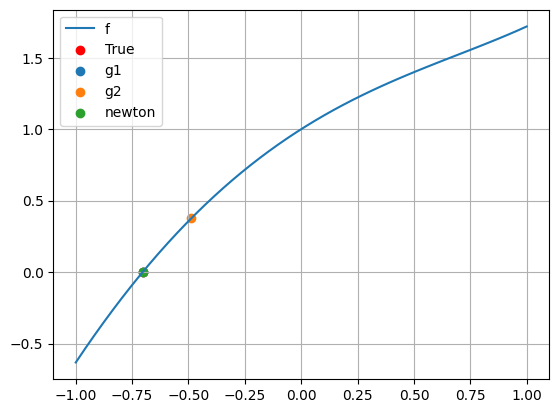

In [ ]:
plot_results(f, (-1, 1), {'g1':sol_g1, 'g2':sol_g2, 'newton':sol_newton}, xTrue)

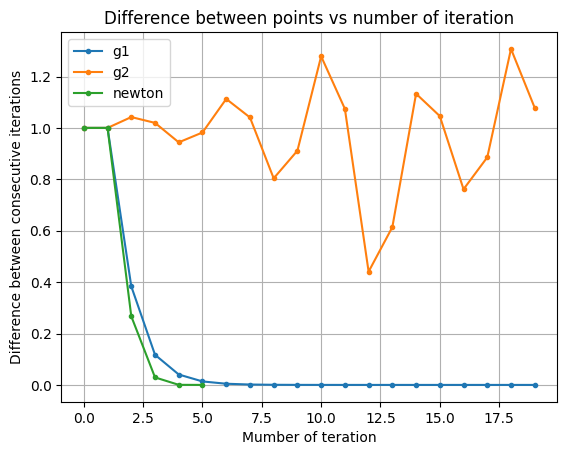

In [ ]:
plot_iters_distance({'g1':dists_g1, 'g2':dists_g2, 'newton':dists_newton})

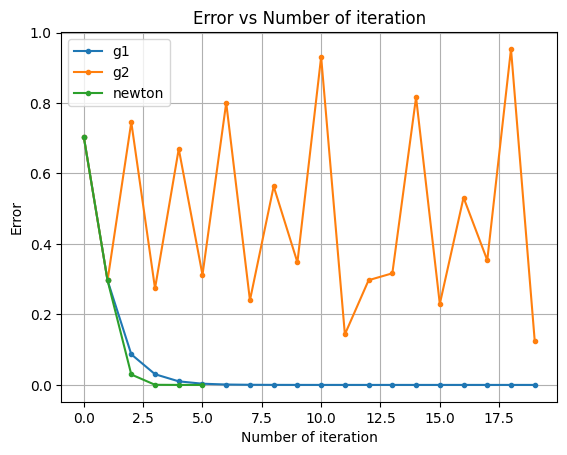

In [ ]:
plot_errors_per_iter({'g1':errs_g1, 'g2':errs_g2, 'newton':errs_newton})

## Application to $f(x) =$ $x^3 +$ $4xcos(x) -$ $ 2$

In [ ]:
f = lambda x: x**3+4*x*np.cos(x)-2
df = lambda x: 3*x**2 + 4*np.cos(x) - 4*np.sin(x)*x
g1 = lambda x: (2-x**3)/(4*np.cos(x))

In [ ]:
xTrue = 0.536839

tolx = 10**(-10)
tolf = 10**(-6)
maxit = 100
x0 = 0

sol_g1, iter_g1, dists_g1, errs_g1 = succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print(f'Fixed-point interation with g1 \n\t x = {sol_g1} \n\t iter_new = {iter_g1} \n')

sol_newton, iter_newton, dists_newton, errs_newton = newton(f, df, tolf, tolx, maxit, xTrue, x0)
print(f"Newton's method \n\t x = {sol_newton} \n\t iter_new = {iter_newton} \n")

Fixed-point interation with g1 
	 x = 0.5368385515655376 
	 iter_new = 10 

Newton's method 
	 x = 0.5368385515667755 
	 iter_new = 5 



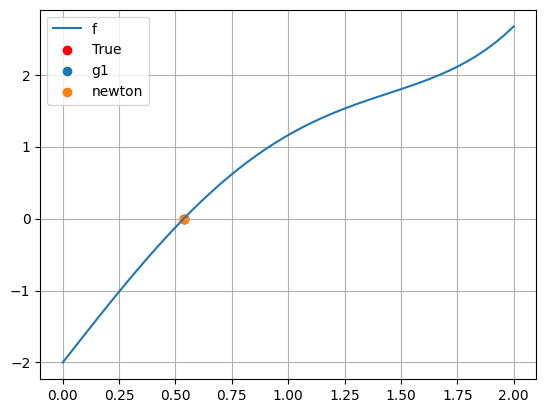

In [ ]:
plot_results(f, (0, 2), {'g1':sol_g1, 'newton':sol_newton}, xTrue)

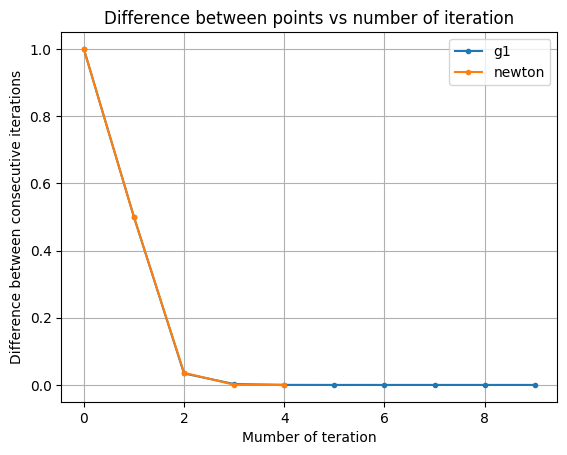

In [ ]:
plot_iters_distance({'g1':dists_g1, 'newton':dists_newton})

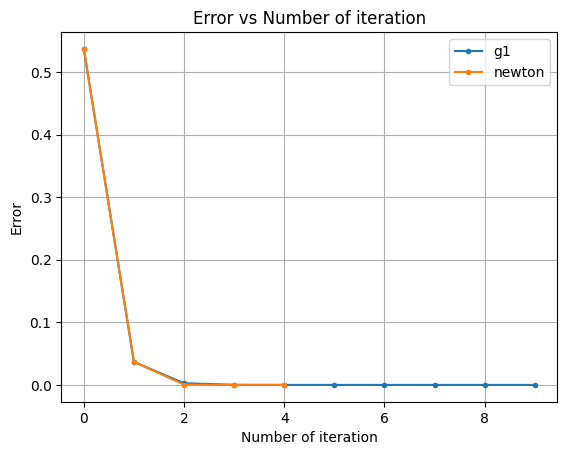

In [ ]:
plot_errors_per_iter({'g1':errs_g1, 'newton':errs_newton})

## Application to $f(x) =$ $x -$ $x^{1/3} -$ $ 2$

In [ ]:
f = lambda x: x - x**(1/3) - 2
df = lambda x: 1 - (1/3) * (x**(-2/3))
g1 = lambda x: x**(1/3) + 2

In [ ]:
xTrue = 3.5213

tolx = 10**(-10)
tolf = 10**(-6)
maxit = 100
x0 = 3

sol_g1, iter_g1, dists_g1, errs_g1 = succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print(f'Fixed-point interation with g1 \n\t x = {sol_g1} \n\t iter_new = {iter_g1} \n')

sol_newton, iter_newton, dists_newton, errs_newton = newton(f, df, tolf, tolx, maxit, xTrue, x0)
print(f"Newton's method \n\t x = {sol_newton} \n\t iter_new = {iter_newton} \n")

Fixed-point interation with g1 
	 x = 3.521379706798214 
	 iter_new = 13 

Newton's method 
	 x = 3.521379706804568 
	 iter_new = 4 



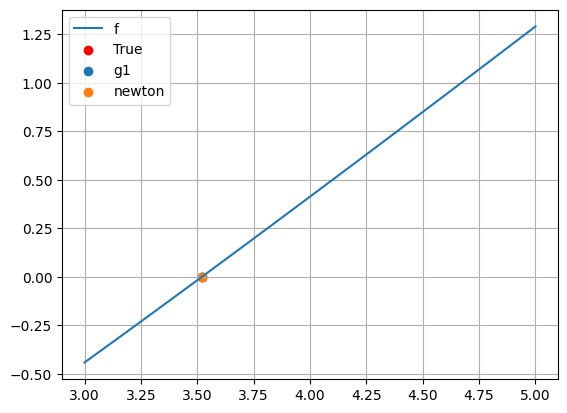

In [ ]:
plot_results(f, (3, 5), {'g1':sol_g1, 'newton':sol_newton}, xTrue)

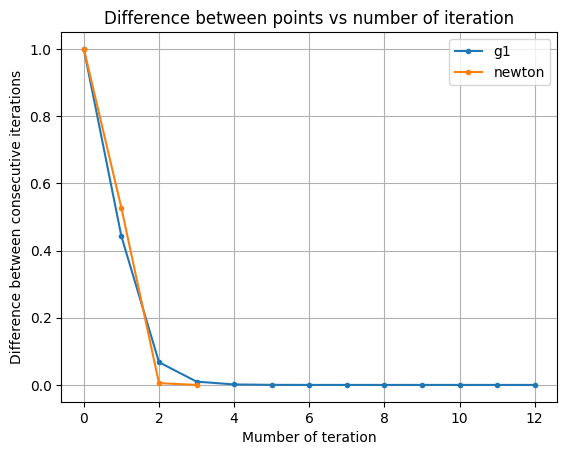

In [ ]:
plot_iters_distance({'g1':dists_g1, 'newton':dists_newton})

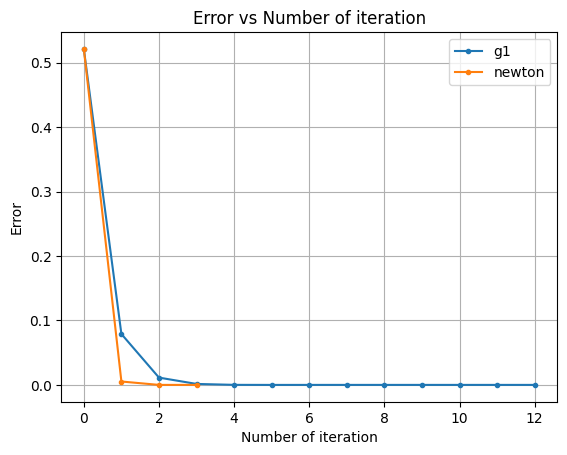

In [ ]:
plot_errors_per_iter({'g1':errs_g1, 'newton':errs_newton})